In [1]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import stats
import healpy as hp
from astropy.io import fits

N_side = 2048      # Healpix map has 12 * N_side**2 pixels

### Cosmic Infrared Background

#### 545 GHz

In [2]:
CIB_data_545 = hp.read_map('Project/COM_CompMap_CIB-GNILC-F545_2048_R2.00.fits')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
CIB_mask = hp.read_map('Project/mask_cib.fits')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/opt/ioa/software/anaconda/anaconda36/envs/20181213_2_py36/lib/python3.6/site-packages/healpy/projaxes.py:977: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


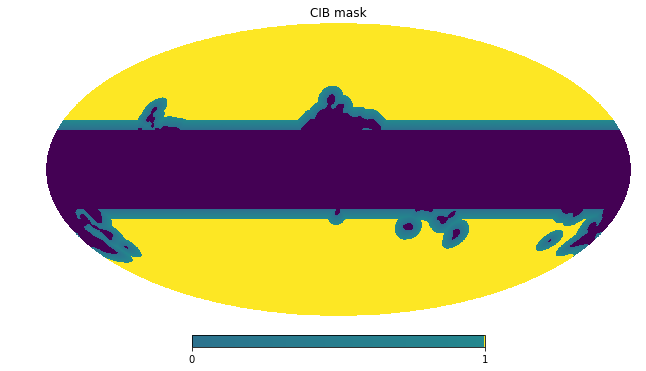

In [5]:
hp.mollview(CIB_mask, title='CIB mask', norm='hist', xsize=2000)

In [3]:
CIB_mask = np.zeros(len(CIB_data_545))

for i in range(0, len(CIB_data_545)):
    if CIB_data_545[i] == 0:
        CIB_mask[i] = 0
    if not CIB_data_545[i] == 0:
        CIB_mask[i] = 1
        
print(CIB_mask)

[ 1.  1.  1. ...,  1.  1.  1.]


/opt/ioa/software/anaconda/anaconda36/envs/20181213_2_py36/lib/python3.6/site-packages/healpy/projaxes.py:977: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


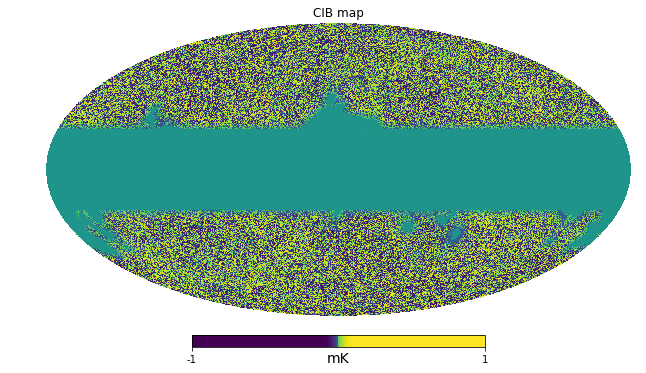

In [4]:
hp.mollview(CIB_data_545, title='CIB map', unit='mK', norm='hist', min=-1,max=1, xsize=2000)
#hp.graticule()

/opt/ioa/software/anaconda/anaconda36/envs/20181213_2_py36/lib/python3.6/site-packages/healpy/projaxes.py:977: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


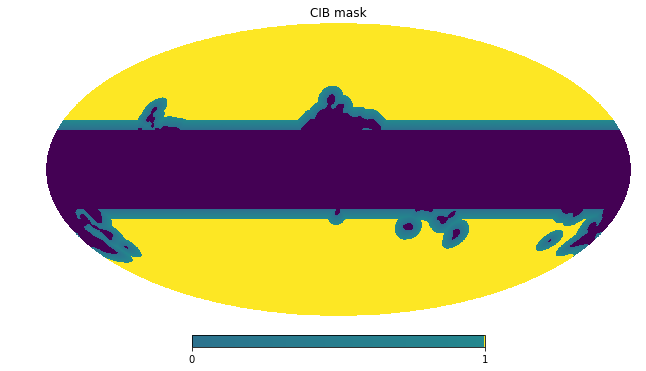

In [5]:
fsky_CIB = np.sum(CIB_mask) * 1. / len(CIB_mask)
hp.mollview(CIB_mask, title='CIB mask', norm='hist', xsize=2000)

In [ ]:
CIB_data_545=CIB_data_545-np.mean(CIB_data_545)
LMAX = 1024
cl_CIB_545 = hp.anafast(CIB_data_545, lmax=LMAX)
l = np.arange(len(cl_CIB_545))


plt.figure()
plt.plot(l, cl_CIB_545/(2*np.pi))
plt.xlabel('$\ell$'); plt.ylabel('$C_{\ell}^{II} / 2\pi [MJy/Sr]^2$'); plt.grid()
plt.ylim(0, 0.25*10**-7)
plt.title('CIB (545 GHz)')

#### 353 GHz

In [7]:
CIB_data_353 = hp.read_map('Project/COM_CompMap_CIB-GNILC-F353_2048_R2.00.fits')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [42]:
CIB_data_353=CIB_data_353-np.mean(CIB_data_353)
LMAX = 1024
cl_CIB_353 = hp.anafast(CIB_data_353, lmax=LMAX)
l = np.arange(len(cl_CIB_353))


plt.figure()
plt.plot(l, cl_CIB_353/(2*np.pi))
plt.xlabel('$\ell$'); plt.ylabel('$C_{\ell}^{II} /2\pi$'); plt.grid()
plt.title('CIB (353 GHz)')

NameError: name 'CIB_data_353' is not defined

### Cosmic Microwave Background Lensing

In [7]:
CMB_lensing_data_alm = hp.read_alm('Project/COM_Lensing_4096_R3.00/TT/dat_klm.fits')            # Load alm file of kappa map
CMB_lensing_data = hp.alm2map(CMB_lensing_data_alm, N_side)  

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/opt/ioa/software/anaconda/anaconda36/envs/20181213_2_py36/lib/python3.6/site-packages/healpy/projaxes.py:977: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


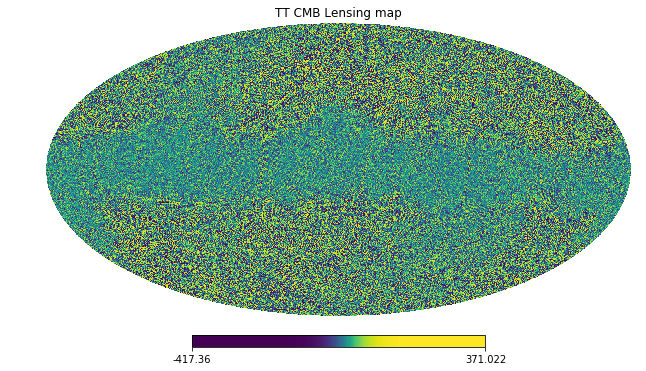

In [12]:
hp.mollview(CMB_lensing_data, title='TT CMB Lensing map',  norm='hist', xsize=2000)
# hp.graticule()

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/opt/ioa/software/anaconda/anaconda36/envs/20181213_2_py36/lib/python3.6/site-packages/healpy/projaxes.py:977: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


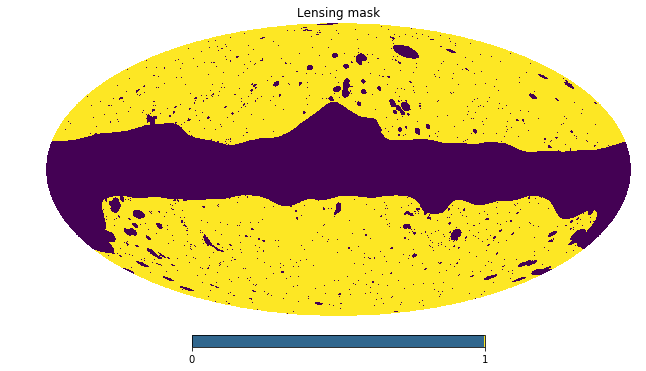

In [8]:
CMB_mask = hp.read_map('Project/COM_Lensing_4096_R3.00/mask.fits')
CMB_lensing_masked = hp.ma(CMB_lensing_data)
CMB_lensing_masked.mask = np.logical_not(CMB_mask)

fsky_CMB = np.sum(CMB_mask) * 1. / len(CMB_mask)
hp.mollview(CMB_mask, title='Lensing mask', norm='hist', xsize=2000)


/opt/ioa/software/anaconda/anaconda36/envs/20181213_2_py36/lib/python3.6/site-packages/healpy/projaxes.py:977: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


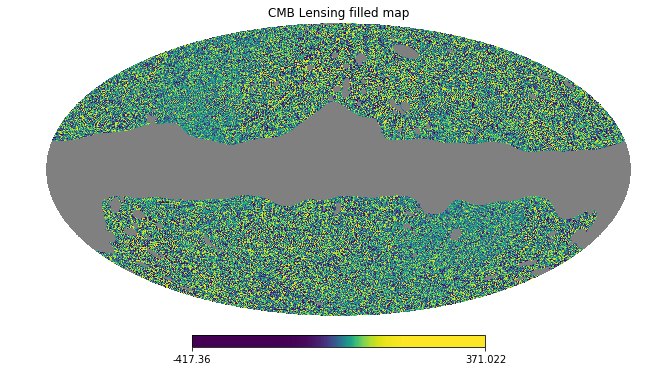

In [36]:
hp.mollview(CMB_lensing_masked.filled(), title='CMB Lensing filled map', norm='hist', xsize=2000)

Text(0.5, 1.0, 'CMB Lensing')

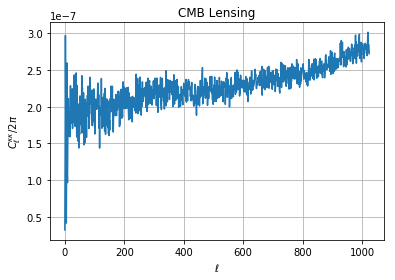

In [41]:
LMAX = 1024
cl_CMB_lensing = hp.anafast(CMB_lensing_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl_CMB_lensing))


plt.figure()
plt.plot(ell, cl_CMB_lensing/(2*np.pi))
plt.xlabel('$\ell$'); plt.ylabel('$C_{\ell}^{\kappa \kappa} /2\pi$'); plt.grid()
plt.title('CMB Lensing')

### Cross Correlation

Text(0.5, 1.0, 'CIB-CMB Lensing correlation power spectrum')

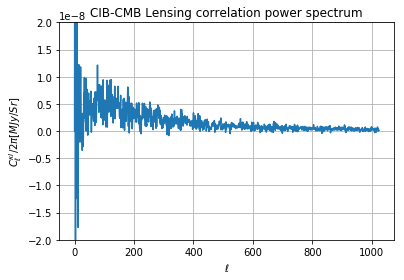

In [46]:
correlated_cls = hp.anafast(CMB_lensing_masked.filled(), CIB_data_545, lmax=LMAX)
ell = np.arange(len(correlated_cls))

plt.figure()
plt.plot(ell, correlated_cls/(2*np.pi))
plt.ylim(-0.00000002, 0.00000002)
plt.xlabel('$\ell$'); plt.ylabel('$C_\ell^{\kappa I} /2\pi [MJy/Sr]$'); plt.grid()
plt.title('CIB-CMB Lensing correlation power spectrum')

### Mask

In [13]:
fsky_CMB, fsky_CIB

(0.67062962055206299, 0.57875503864277988)

In [14]:
mask = CIB_mask * CMB_mask
fsky = np.sum(mask) * 1. / len(mask)
fsky

0.55645606671615766

/opt/ioa/software/anaconda/anaconda36/envs/20181213_2_py36/lib/python3.6/site-packages/healpy/projaxes.py:977: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


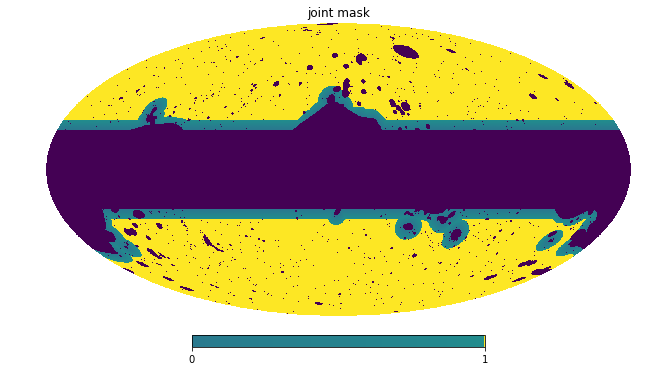

In [15]:
hp.mollview(mask, title='joint mask', norm='hist', xsize=2000)

### Binning

In [16]:
# Number of bins and range
Nbins = 25
lmin = 10
lmax = 1024

print('Binning...')
bins = np.round(np.linspace(lmin, lmax, Nbins+1))   # Bin edges
bins = bins.astype(int)

lcenterbin = np.zeros(len(bins)-1)

binned_CIB_545 = np.zeros(len(bins)-1)
# binned_CIB_353 = np.zeros(len(bins)-1)
binned_CMB = np.zeros(len(bins)-1)
binned_corr_cls = np.zeros(len(bins)-1)

#CIB 545
for k in range(0, len(bins)-1):  
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
 
    for l in lmaxvec:
        binned_CIB_545[k] += cl_CIB_545[l]
    binned_CIB_545[k] = binned_CIB_545[k] / len(lmaxvec)

# #CIB 353
# for k in range(0, len(bins)-1):  
#     lmaxvec = np.arange(bins[k], bins[k+1], 1)
 
#     for l in lmaxvec:
#         binned_CIB_353[k] += cl_CIB_353[l]
#     binned_CIB_353[k] = binned_CIB_353[k] / len(lmaxvec)
    
    
for k in range(0, len(bins)-1): 
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    for l in lmaxvec:
        binned_CMB[k] += cl_CMB_lensing[l]
    binned_CMB[k] = binned_CMB[k] / len(lmaxvec)

for k in range(0, len(bins)-1): 
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    lcenterbin[k] = np.round(0.5 * (bins[k] + bins[k+1]))   # bin center
    for l in lmaxvec:
        binned_corr_cls[k] += correlated_cls[l]

    binned_corr_cls[k] = binned_corr_cls[k] / len(lmaxvec)

Binning...


--

## Binned Plots

Text(0, 0.5, '$C_\\ell^{\\kappa I}$')

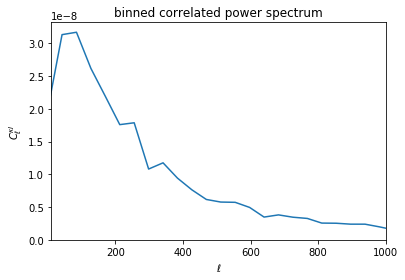

In [17]:
plt.figure()
#plt.plot(ell, correlated_cls)
plt.plot(np.linspace(0, 1024, 25), binned_corr_cls)

plt.xlim(10, 1000)
#plt.ylim(-1*(10**-7), 1*(10**-7))
plt.title('binned correlated power spectrum')
plt.xlabel('$\ell$'); plt.ylabel('$C_\ell^{\kappa I}$')



### Errors

#### Correlated

In [18]:
delta_cls = np.zeros(len(bins)-1)
len(delta_cls)

for k in range(0, len(bins)-1):
    lmaxvec = np.arange(bins[k], bins[k+1], 1)

    for l in lmaxvec:
        delta_cls[k] += fsky * (2. * l + 1.) / ((cl_CMB_lensing[l]/fsky_CMB) * (cl_CIB_545[l]/fsky_CIB) + correlated_cls[l]**2)
    delta_cls[k] = 1. / delta_cls[k]
delta_cls = np.sqrt(delta_cls)



#### CMB

In [19]:
delta_cls_CMB = np.zeros(len(bins)-1)
len(delta_cls_CMB)

for k in range(0, len(bins)-1):
    lmaxvec = np.arange(bins[k], bins[k+1], 1)

    for l in lmaxvec:
        delta_cls_CMB[k] += fsky * (2. * l + 1.) / (2*(cl_CMB_lensing[l]/fsky_CMB)**2)
    delta_cls_CMB[k] = 1. / delta_cls_CMB[k]
delta_cls_CMB = np.sqrt(delta_cls_CMB)

#### CIB

In [22]:
len(bins)

26

In [20]:
delta_cls_CIB_545 = np.zeros(len(bins)-1)
len(delta_cls_CIB_545)

for k in range(0, len(bins)-1):
    lmaxvec = np.arange(bins[k], bins[k+1], 1)

    for l in lmaxvec:
        delta_cls_CIB_545[k] += fsky * (2. * l + 1.) / (2*(cl_CIB_545[l]/fsky_CIB)**2)
    delta_cls_CIB_545[k] = 1. / delta_cls_CIB_545[k]
delta_cls_CIB_545 = np.sqrt(delta_cls_CIB_545)

(-5e-09, 2e-08)

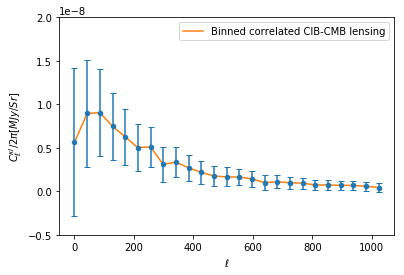

In [25]:
plt.errorbar(np.linspace(0, 1024, Nbins), binned_corr_cls/(2*np.pi*fsky), delta_cls, linestyle='None', marker='o', markersize=4.5, capsize=3)
plt.plot(np.linspace(0, 1024, Nbins), binned_corr_cls/(2*np.pi*fsky), label='Binned correlated CIB-CMB lensing')
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{\kappa I}/2 \pi [MJy/Sr] $')
plt.legend(loc='best')
plt.ylim(-0.05*(10**-7), 0.2*(10**-7))
#plt.savefig('Project/Correlated everything.png')

(0, 2e-08)

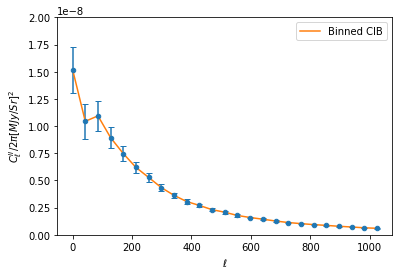

In [22]:
plt.errorbar(np.linspace(0, 1024, 25), (binned_CIB_545/(2*np.pi*fsky_CIB)), delta_cls_CIB_545, linestyle='None', marker='o', markersize=4.5, capsize=3)
plt.plot(np.linspace(0, 1024, 25), binned_CIB_545/(2*np.pi*fsky_CIB), label='Binned CIB')
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{II}/2\pi [MJy/Sr]^2$')
plt.legend(loc='best')
plt.ylim(0, 0.2*(10**-7))
# plt.savefig('Project/CIB everything.png')

(1.5e-07, 4.5e-07)

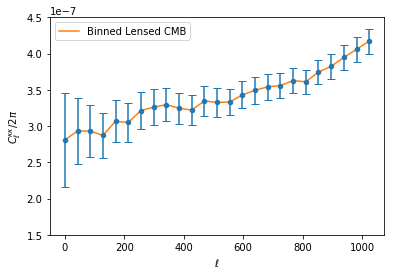

In [23]:
plt.errorbar(np.linspace(0, 1024, Nbins), binned_CMB/(2*np.pi*fsky_CMB), delta_cls_CMB, linestyle='None', marker='o', markersize=4.5, capsize=4)
plt.plot(np.linspace(0, 1024, Nbins), binned_CMB/(2*np.pi*fsky_CMB), label='Binned CMB Lensing ')

plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{\kappa \kappa}/2\pi$')
plt.legend(loc='best')
plt.ylim(1.5*(10**-7), 4.5*(10**-7))
#plt.savefig('Project/2pi CMB plot.png', bbox_inches = "tight")
# plt.savefig('Project/CMB everything.png')

--

## Final Figures

### Final CIB-lensed CMB correlation plot

In [24]:
len(binned_corr_cls)
len(delta_cls)

25

(-5e-09, 2e-08)

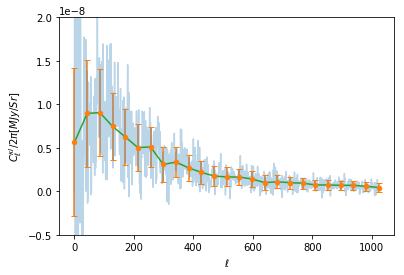

In [26]:
plt.plot(ell, correlated_cls/(2*np.pi*fsky), alpha=0.3)
plt.errorbar(np.linspace(0, 1024, Nbins), binned_corr_cls/(2*np.pi*fsky), delta_cls, linestyle='None', marker='o', markersize=4.5, capsize=3)
plt.plot(np.linspace(0, 1024, Nbins), binned_corr_cls/(2*np.pi*fsky))
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{\kappa I}/2 \pi [MJy/Sr] $')
plt.ylim(-0.05*(10**-7), 0.2*(10**-7))
#plt.savefig('Project/Correlated everything.png')

Text(0, 0.5, '$\\ell C_\\ell^{\\kappa I}/2 \\pi [MJy/Sr] $')

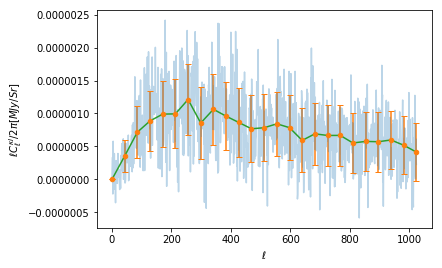

In [26]:
plt.plot(ell, ell*correlated_cls/(2*np.pi*fsky), alpha=0.3)
plt.errorbar(np.linspace(0, 1024, Nbins), np.linspace(0, 1024, Nbins)*binned_corr_cls/(2*np.pi*fsky), np.linspace(0, 1024, Nbins)*delta_cls, linestyle='None', marker='o', markersize=4.5, capsize=3)
plt.plot(np.linspace(0, 1024, Nbins), np.linspace(0, 1024, Nbins)*binned_corr_cls/(2*np.pi*fsky))
plt.xlabel('$\ell$')
plt.ylabel('$\ell C_\ell^{\kappa I}/2 \pi [MJy/Sr] $')
#plt.ylim(-0.05*(10**-7), 0.2*(10**-7))
#plt.savefig('Project/Correlated everything.png')

--

### CIB autospectrum 

#### 545 GHz

In [27]:
len(np.linspace(0, 1024, 25)[1::4]), len((binned_CIB_545/(2*np.pi*fsky_CIB))[1::4])

(6, 6)

In [28]:
len(binned_CIB_545)


25

(0, 2e-08)

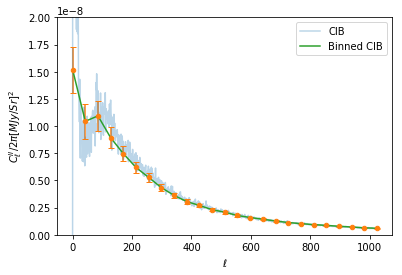

In [27]:
plt.plot(ell, cl_CIB_545/(2*np.pi*fsky_CIB), label='CIB', alpha=0.3)

plt.errorbar(np.linspace(0, 1024, 25), (binned_CIB_545/(2*np.pi*fsky_CIB)), delta_cls_CIB_545, linestyle='None', marker='o', markersize=4.5, capsize=3)

plt.plot(np.linspace(0, 1024, 25), binned_CIB_545/(2*np.pi*fsky_CIB), label='Binned CIB')
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{II}/2\pi [MJy/Sr]^2$')
plt.legend(loc='best')
plt.ylim(0, 0.2*(10**-7))
# plt.savefig('Project/CIB everything.png')

(0, 4.000000000000001e-06)

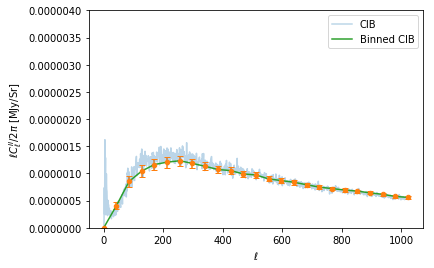

In [30]:
plt.plot(ell, ell*cl_CIB_545/(2*np.pi*fsky_CIB), label='CIB', alpha=0.3)
plt.errorbar(np.linspace(0, 1024, Nbins), np.linspace(0, 1024, Nbins)*binned_CIB_545/(2*np.pi*fsky_CIB), np.linspace(0, 1024, Nbins)*delta_cls_CIB_545, linestyle='None', marker='o', markersize=4.5, capsize=3)
plt.plot(np.linspace(0, 1024, Nbins), np.linspace(0, 1024, Nbins)*binned_CIB_545/(2*np.pi*fsky_CIB), label='Binned CIB')
plt.xlabel('$\ell$')
plt.ylabel('$\ell C_\ell^{II}/2\pi$ [MJy/Sr]')
plt.legend(loc='best')
plt.ylim(0, 0.4*(10**-5))

--

### Lensed CMB autospectrum

(1.5e-07, 4.5e-07)

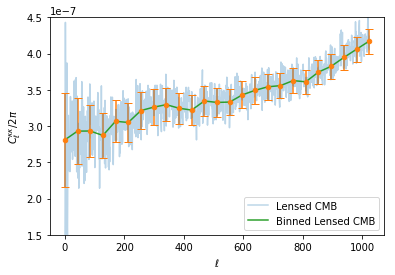

In [28]:
plt.plot(ell, cl_CMB_lensing/(2*np.pi*fsky_CMB), label='Lensed CMB', alpha=0.3)
plt.errorbar(np.linspace(0, 1024, Nbins), binned_CMB/(2*np.pi*fsky_CMB), delta_cls_CMB, linestyle='None', marker='o', markersize=4.5, capsize=4)
plt.plot(np.linspace(0, 1024, Nbins), binned_CMB/(2*np.pi*fsky_CMB), label='Binned Lensed CMB')
#plt.ylim(0, 5*(10**-7))

plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{\kappa \kappa}/2\pi$')
plt.legend(loc='best')
plt.ylim(1.5*(10**-7), 4.5*(10**-7))
#plt.savefig('Project/2pi CMB plot.png', bbox_inches = "tight")
# plt.savefig('Project/CMB everything.png')

--

### More Bins for CIB

In [29]:
# Number of bins and range
Nbins = 80
lmin = 10
lmax = 1024

print('Binning...')
bins = np.round(np.linspace(lmin, lmax, Nbins+1))   # Bin edges
bins = bins.astype(int)

lcenterbin = np.zeros(len(bins)-1)

binned_CIB_morebins = np.zeros(len(bins)-1)

for k in range(0, len(bins)-1):  
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    lcenterbin[k] = np.round(0.5 * (bins[k] + bins[k+1]))   # bin center 
    for l in lmaxvec:
        binned_CIB_morebins[k] += cl_CIB_545[l]
    binned_CIB_morebins[k] = binned_CIB_morebins[k] / len(lmaxvec)



Binning...


Text(0, 0.5, '$C_\\ell^{II}$')

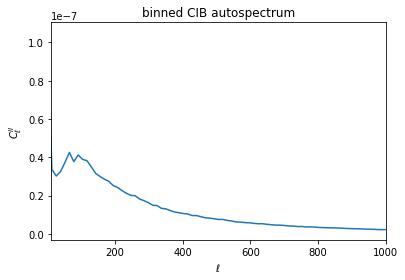

In [30]:
plt.figure()
#plt.plot(ell, correlated_cls)
plt.plot(np.linspace(0, 1024, Nbins), binned_CIB_morebins)
plt.xlim(10, 1000)
#plt.ylim(-1*(10**-7), 1*(10**-7))
plt.title('binned CIB autospectrum')
plt.xlabel('$\ell$'); plt.ylabel('$C_\ell^{II}$')


In [31]:
binsm = 80
binsm = np.round(np.linspace(lmin, lmax, binsm+1))   # Bin edges
binsm = binsm.astype(int)

delta_cls_CIB_morebins = np.zeros(len(binsm)-1)
len(delta_cls_CIB_morebins)

for k in range(0, len(binsm)-1):
    lmaxvec = np.arange(binsm[k], binsm[k+1], 1)

    for l in lmaxvec:
        delta_cls_CIB_morebins[k] += fsky * (2. * l + 1.) / (2*(cl_CIB_545[l]/fsky_CIB)**2)
    delta_cls_CIB_morebins[k] = 1. / delta_cls_CIB_morebins[k]
delta_cls_CIB_morebins = np.sqrt(delta_cls_CIB_morebins)

(0, 1.5e-08)

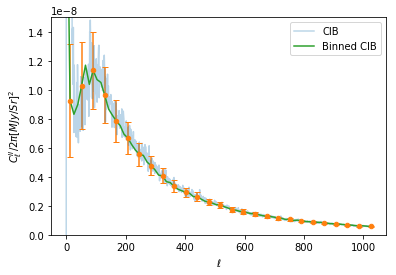

In [32]:
plt.plot(ell, cl_CIB_545/(2*np.pi*fsky_CIB), label='CIB', alpha=0.3)

plt.errorbar(np.linspace(0, 1024, 80)[1::3], (binned_CIB_morebins/(2*np.pi*fsky_CIB))[1::3], delta_cls_CIB_morebins[1::3], linestyle='None', marker='o', markersize=4.5, capsize=3)

plt.plot(np.linspace(0, 1024, 80), binned_CIB_morebins/(2*np.pi*fsky_CIB), label='Binned CIB')
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{II}/2\pi [MJy/Sr]^2$')
plt.legend(loc='best')
plt.ylim(0, 0.15*(10**-7))
# plt.savefig('Project/CIB everything.png')

(0, 2.0000000000000003e-06)

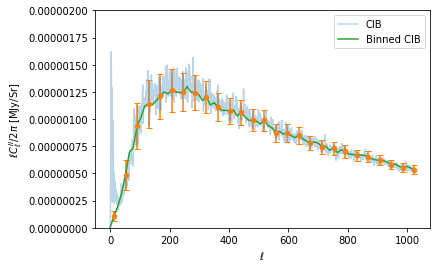

In [36]:
plt.plot(ell, ell*cl_CIB_545/(2*np.pi*fsky_CIB), label='CIB', alpha=0.3)
plt.errorbar(np.linspace(0, 1024, 80)[1::3], (np.linspace(0, 1024, 80)*binned_CIB_morebins/(2*np.pi*fsky_CIB))[1::3], ((np.linspace(0, 1024, 80))*delta_cls_CIB_morebins)[1::3], linestyle='None', marker='o', markersize=4.5, capsize=3)
plt.plot(np.linspace(0, 1024, 80), np.linspace(0, 1024, 80)*binned_CIB_morebins/(2*np.pi*fsky_CIB), label='Binned CIB')
plt.xlabel('$\ell$')
plt.ylabel('$\ell C_\ell^{II}/2\pi$ [MJy/Sr]')
plt.legend(loc='best')
plt.ylim(0, 0.2*(10**-5))

In [33]:
from astropy.io import ascii
from astropy.table import Table

In [34]:
binned_data_table = Table([binned_CIB_545, binned_CMB, binned_corr_cls], names=('binned_CIB', 'binned_CMB', 'binned_corr_cls'))
data_table = Table([cl_CMB_lensing, cl_CIB_545, correlated_cls, ell], names=('cl_CMB_lensing', 'cl_CIB', 'correlated_cls', 'ell'))
error_table = Table([delta_cls_CMB, delta_cls, delta_cls_CIB_545], names=('delta_cls_CMB', 'delta_cls', 'delta_cls_CIB'))
more_bins = Table([binned_CIB_morebins, delta_cls_CIB_morebins], names=('binned_CIB_morebins', 'delta_cls_CIB_morebins'))

In [35]:
ascii.write(binned_data_table, 'binned data.txt')
ascii.write(data_table, 'cl data.txt')
ascii.write(error_table, 'error data.txt')
ascii.write(more_bins, 'CIB data more bins.txt')

#### Full Planck 545GHz Survey

In [40]:
full_545_data = hp.read_map('Project/data/HFI_SkyMap_545-field-Int_2048_R3.00_full.fits')
#hp.mollview(full_545_data, title='full survey map', unit='mK', norm='hist', min=-1,max=1, xsize=2000)

/opt/ioa/software/anaconda/anaconda36/envs/20181213_2_py36/lib/python3.6/site-packages/healpy/fitsfunc.py:367: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


Text(0.5, 1.0, 'Power Spectrum of full 545GHz Survey')

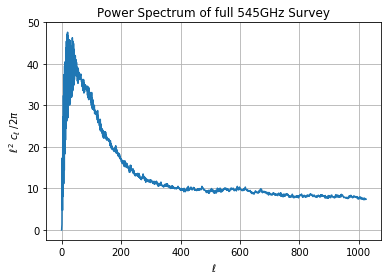

In [41]:
full_545_data=full_545_data-np.mean(full_545_data)
LMAX = 1024
cl_full_545 = hp.anafast(full_545_data, lmax=LMAX)
l = np.arange(len(cl_full_545))


plt.figure()
plt.plot(l, ((l**2)*cl_full_545)/(2*np.pi))
plt.xlabel('$\ell$'); plt.ylabel('$\ell^2 \ c_{\ell} \ /2 \pi$'); plt.grid()
plt.title('Power Spectrum of full 545GHz Survey')

correlation with lensed CMB

(-0.00025, 0.00025)

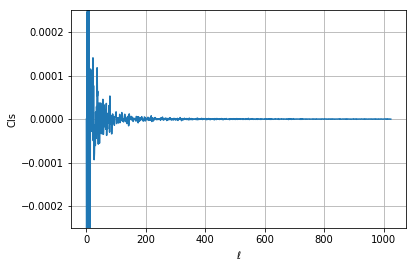

In [42]:
correlated_cls_fullsurvey = hp.anafast(CMB_lensing_masked.filled(), full_545_data, lmax=LMAX)
ell = np.arange(len(correlated_cls_fullsurvey))

plt.figure()
plt.plot(ell, correlated_cls_fullsurvey)
plt.xlabel('$\ell$'); plt.ylabel('Cls'); plt.grid()
plt.ylim(-0.00025, 0.00025)

Binning for full survey comparison

In [43]:
binned_full_survey = np.zeros(len(bins)-1)
binned_corr_cls_fullsurvey = np.zeros(len(bins)-1)

for k in range(0, len(bins)-1): 
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    for l in lmaxvec:
        binned_full_survey[k] += cl_full_545[l]
    binned_full_survey[k] = binned_full_survey[k] / len(lmaxvec)

for k in range(0, len(bins)-1): 
    lmaxvec = np.arange(bins[k], bins[k+1], 1)
    lcenterbin[k] = np.round(0.5 * (bins[k] + bins[k+1]))   # bin center
    for l in lmaxvec:
        binned_corr_cls_fullsurvey[k] += correlated_cls_fullsurvey[l]
        
    binned_corr_cls_fullsurvey[k] = binned_corr_cls_fullsurvey[k] / len(lmaxvec)
        

(-1e-06, 2e-06)

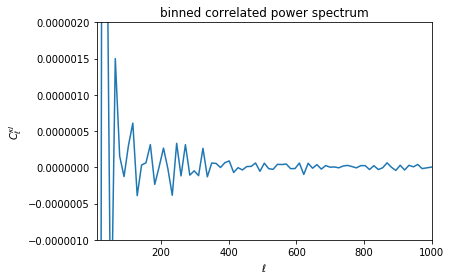

In [44]:
plt.figure()
#plt.plot(ell, correlated_cls)
plt.plot(np.linspace(0, 1024, Nbins), binned_corr_cls_fullsurvey)

plt.xlim(10, 1000)
#plt.ylim(-1*(10**-7), 1*(10**-7))
plt.title('binned correlated power spectrum')
plt.xlabel('$\ell$'); plt.ylabel('$C_\ell^{\kappa I}$')
plt.ylim(-0.000001, 0.000002)


(-2e-05, 2e-05)

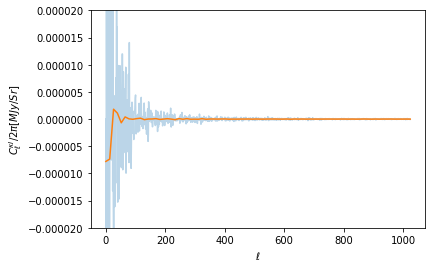

In [45]:
plt.plot(ell, correlated_cls_fullsurvey/(2*np.pi*fsky), alpha=0.3)
#plt.errorbar(np.linspace(0, 1024, Nbins), binned_corr_cls_fullsurvey/(2*np.pi*fsky), delta_cls, linestyle='None', marker='o', markersize=4.5, capsize=3)
plt.plot(np.linspace(0, 1024, Nbins), binned_corr_cls_fullsurvey/(2*np.pi*fsky))
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell^{\kappa I}/2 \pi [MJy/Sr] $')
plt.ylim(-0.00002, 0.00002)
